In [3]:
import pandas as pd

In [1]:
cd "C:\Users\Chad\Desktop\CRWA Project\Public_Survey"

C:\Users\Chad\Desktop\CRWA Project\Public_Survey
C:\Users\Chad\Desktop\CRWA Project\Public_Survey


In [79]:
Responses_raw=pd.read_csv('./Cleaned_Responses.csv')

In [80]:
Responses_raw.columns

Index(['Town', 'Out of State?', 'Neighborhood', 'Renter', 'Trees', 'Tree_Clean', 'Planting',
       'Protection', 'Future'],
      dtype='object')

In [81]:
Responses_raw.Town.unique().size

38

In [82]:
Responses=Responses_raw
Responses['TOWN']=Responses_raw.Town.str.upper()

In [83]:
Responses=Responses[['TOWN']].dropna()

In [84]:
import numpy as np
Responses

,TOWN
0,NEWTON
1,BROOKLINE
2,BOSTON
3,NATICK
4,BOSTON
...,...
306,NEWTON
307,NEWTON
308,DOVER
309,NEWTON


In [85]:
Responses.TOWN.value_counts()

TOWN
NEWTON         94
BOSTON         52
CAMBRIDGE      31
SOMERVILLE     19
WATERTOWN      18
WELLESLEY      10
WALTHAM        10
NATICK          7
DEDHAM          6
NEEDHAM         5
WESTON          5
ROSLINDALE      4
BROOKLINE       4
BELMONT         4
DOVER           4
ARLINGTON       3
QUINCY          2
MEDFORD         2
WOBURN          2
MEDWAY          2
MILLIS          2
NEW BEDFORD     1
WALPOLE         1
NORFOLK         1
SHERBORN        1
GOSHEN          1
MELROSE         1
WESTHAMPTON     1
BELLINGHAM      1
WESTWOOD        1
MALDEN          1
DORCHESTER      1
MARSHFIELD      1
GLOUCESTER      1
CHELSEA         1
MILTON          1
LINCOLN         1
Name: count, dtype: int64

In [86]:
Responses.TOWN.value_counts().values

array([94, 52, 31, 19, 18, 10, 10,  7,  6,  5,  5,  4,  4,  4,  4,  3,  2,  2,  2,  2,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [87]:
Counts=pd.DataFrame({'TOWN':Responses.TOWN.value_counts().index,'Count':Responses.TOWN.value_counts().values})

In [88]:
Counts.columns

Index(['TOWN', 'Count'], dtype='object')

In [89]:
Counts

,TOWN,Count
0,NEWTON,94
1,BOSTON,52
2,CAMBRIDGE,31
3,SOMERVILLE,19
4,WATERTOWN,18
5,WELLESLEY,10
6,WALTHAM,10
7,NATICK,7
8,DEDHAM,6
9,NEEDHAM,5


In [90]:
import geopandas as gpd

In [91]:
Towns=gpd.read_file('https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/townssurvey_shp.zip',layer='TOWNSSURVEY_POLYM')

In [92]:
Towns.columns

Index(['TOWN', 'TOWN_ID', 'TYPE', 'COUNTY', 'FIPS_STCO', 'FOURCOLOR', 'POP1960', 'POP1970', 'POP1980',
       'POP1990', 'POP2000', 'POP2010', 'POP2020', 'POPCH10_20', 'AREA_ACRES', 'AREA_SQMI',
       'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [93]:
Towns.TOWN

0            TOLLAND
1             CANTON
2            MASHPEE
3          LYNNFIELD
4         BARNSTABLE
           ...      
346        STOUGHTON
347          CHATHAM
348    WEST BOYLSTON
349          HINGHAM
350        BLANDFORD
Name: TOWN, Length: 351, dtype: object

In [94]:
Towns_wResponses=Towns.merge(Counts,on='TOWN')

In [95]:
Towns_wResponses=Towns_wResponses[['TOWN','geometry','Count']]

In [96]:
CRW=gpd.read_file(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\CRW_Boundary\CRW_Boundary\CRW_Boundary.shp")
Tribs=gpd.read_file('../Raw_Data/Rivers/Tributaries.shp')
CHARLES=Tribs[Tribs.SARISNAME=='CHARLES RIVER']
rivers=gpd.read_file('../Raw_Data/Hydro/HYDRO25K_POLY.shp').clip(CRW)
Charles=rivers[rivers['NAME']=='Charles River'].to_crs(epsg=26986)
rivers_arc=gpd.read_file('../Raw_Data/Hydro/HYDRO25K_ARC.shp').clip(CRW)

C:\Users\Chad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


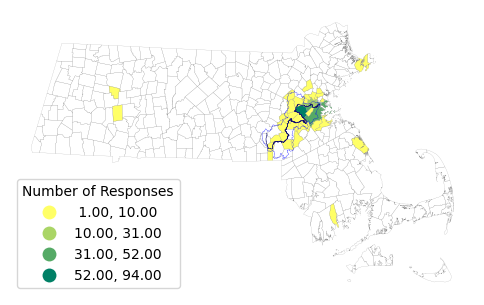

In [97]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(6,8))
Towns_wResponses.plot(ax=ax,column='Count',legend=True,scheme="natural_breaks",k=4,cmap='summer_r',legend_kwds={'loc':'lower left','title':'Number of Responses'})
Towns.boundary.plot(ax=ax,color='gray',linewidth=0.1)
gpd.read_file(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\CRW_Boundary\CRW_Boundary\CRW_Boundary.shp").boundary.plot(ax=ax,color='blue',linewidth=0.2)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)
ax.axis('off')
fig.savefig('Towns with Responses.png',transparent=False,dpi=300,bbox_inches='tight')

In [98]:
Responses_raw.Renter.value_counts()

Renter
Owner                   242
Renter                   57
Prefer not to answer      9
Name: count, dtype: int64

In [99]:
labels=['Owner','Renter','No Response']
sizes=Responses_raw.Renter.value_counts().values
sizes=sizes/Responses_raw.Renter.unique().size
sizes[2]=100.0-sizes[1]-sizes[0]

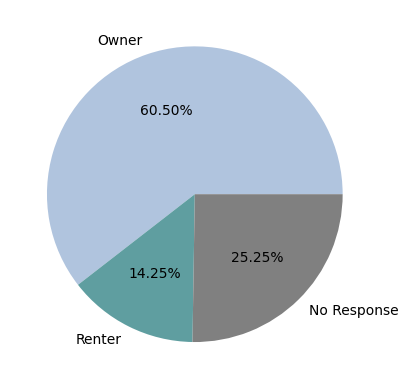

In [100]:
plt.pie(sizes,labels=labels,autopct='%1.2f%%',
        colors=['lightsteelblue', 'cadetblue', 'gray'])
plt.savefig('Ownership status.png',dpi=300,bbox_inches='tight')

In [102]:
Responses_raw.Tree_Clean.value_counts()

Tree_Clean
No                               228
Yes                               47
Somewhat                          25
Other                              6
For me yes, but not elsewhere      5
Name: count, dtype: int64

In [103]:
labels=['No','Yes','Somewhat','Other','Yes, but not elsewhere']
sizes=Responses_raw.Tree_Clean.value_counts().values
sizes=sizes/Responses_raw.Tree_Clean.unique().size

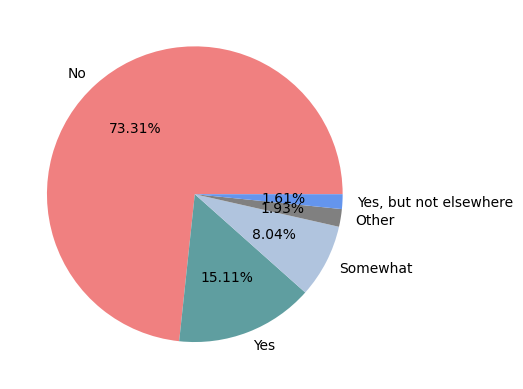

In [108]:
plt.pie(sizes,labels=labels,autopct='%1.2f%%',
        colors=['lightcoral','cadetblue', 'lightsteelblue', 'gray','cornflowerblue'])
plt.savefig('Enough Trees.png',dpi=300,bbox_inches='tight')

In [112]:
CRW_Towns=Towns.clip(CRW)
CRW_Towns=CRW_Towns[['TOWN','geometry']]

In [113]:
Responses_raw.Tree_Clean

0                           Somewhat
1                           Somewhat
2                           Somewhat
3      For me yes, but not elsewhere
4                              Other
                   ...              
306                              Yes
307                            Other
308                            Other
309                            Other
310                            Other
Name: Tree_Clean, Length: 311, dtype: object

In [114]:
Towns_wResponses

,TOWN,geometry,Count
0,DOVER,"POLYGON ((216634.163 891551.685, 216647.142 89...",4
1,WESTWOOD,"POLYGON ((227514.413 885958.825, 229226.782 88...",1
2,MEDFORD,"MULTIPOLYGON (((234089.062 910545.295, 233900....",2
3,CAMBRIDGE,"POLYGON ((230353.943 905738.525, 230689.843 90...",31
4,GLOUCESTER,"MULTIPOLYGON (((264186.562 935044.815, 264207....",1
5,WALPOLE,"POLYGON ((219956.348 883747.993, 219963.252 88...",1
6,SOMERVILLE,"POLYGON ((230662.712 907352.685, 230461.023 90...",19
7,WELLESLEY,"MULTIPOLYGON (((219129.013 897474.705, 219160....",10
8,NEEDHAM,"POLYGON ((222991.142 895149.415, 223015.263 89...",5
9,QUINCY,"MULTIPOLYGON (((242254.612 895020.505, 242257....",2


In [117]:
Nos=Responses_raw[Responses_raw.Tree_Clean=='No']
Nos=pd.DataFrame({'TOWN':Nos.Town.value_counts().index,'Count':Nos.Town.value_counts().values})

In [119]:
Nos['TOWN']=Nos['TOWN'].str.upper()

In [120]:
Nos

,TOWN,Count
0,NEWTON,64
1,BOSTON,42
2,CAMBRIDGE,26
3,SOMERVILLE,18
4,WATERTOWN,17
5,WALTHAM,9
6,WELLESLEY,6
7,NATICK,5
8,DEDHAM,5
9,ARLINGTON,3


In [121]:
Towns_wResponses2=Towns_wResponses.merge(Nos,on='TOWN')

In [123]:
Towns_wResponses2['PercNo']=100*Towns_wResponses2['Count_y']/Towns_wResponses2['Count_x']

In [125]:
Towns_wResponses2=Towns_wResponses2.clip(CRW)

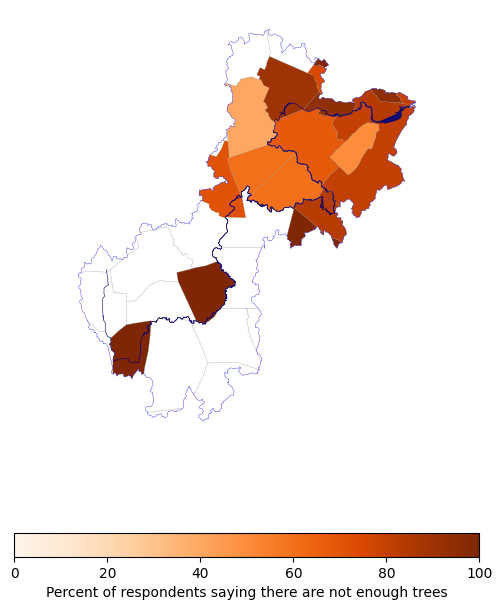

In [131]:
fig,ax=plt.subplots(figsize=(6,8))
Towns_wResponses2.plot(ax=ax,column='PercNo',vmin=0,vmax=100,legend=True,cmap='Oranges',legend_kwds={'location':'bottom','label':'Percent of respondents saying there are not enough trees'})
CRW_Towns.boundary.plot(ax=ax,color='gray',linewidth=0.1)
gpd.read_file(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\CRW_Boundary\CRW_Boundary\CRW_Boundary.shp").boundary.plot(ax=ax,color='blue',linewidth=0.2)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.25)
CHARLES.to_crs(epsg=26986).plot(ax=ax,color='#060270',linewidth=0.4)
ax.axis('off')
fig.savefig('Towns with Percent Not enough trees.png',transparent=False,dpi=300,bbox_inches='tight')